# OPEN AI GYM


In [1]:
%matplotlib inline

import numpy as np
# import torch
import matplotlib.pyplot as plt
from agent import Agent
from monitor import interact
import gym
import numpy as np

In [1]:
def avg_episodic_reward(avgRewards, save=False, save_name="training_rates.png"):
    avgRewards = np.asarray(avgRewards, dtype=np.float32)
    x = [ i + 1 for i in range(avgRewards[0].size)]
    fig, ax = plt.subplots()
    for y in avgRewards:
        ax.plot(x, y)
    ax.set(xlabel='Number of Episodes', ylabel='Reward Value',
           title='20k of episodes ran 5 times')
    ax.grid()
    if save:
        fig.savefig(save_name)
    plt.show()
    
def best_avg_by_trial(bestRewards, save=False, save_name="trial_results.png"):
    bestRewards = np.asarray(bestRewards, dtype=np.float32)
    print(bestRewards.shape)
    x = [i + 1 for i in range(bestRewards.shape[0])]
    y = bestRewards
    mean = np.mean(y)
    mean_y = np.empty(len(x) + 2)
    mean_y.fill(mean)
    mean_x = [ i for i in range(len(x) + 2)]
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.set(xlim=(0.5, x[-1] + 0.5), ylim=(min(y) - 0.25, max(y) + 0.25))
    ax.bar(x,y)
    ax.plot(mean_x, mean_y, color='red')
    ax.set(xlabel='Trial number', ylabel='Reward Value',
           title='Results by Trial')
    if save:
        fig.savefig(save_name, bbox_inches='tight')
    plt.show()

## Expected Sarsa Algorithm
Below is a 5 trial simulation using  the Expected Sarsa on policy algorithm.

In [4]:
# results for taxi-v2 
# no epsilon decay
# nA=6, alpha=0.1, epsilon=0.01, gamma=0.75 -> 9.075999999999999 over 5 tries
# nA=6, alpha=0.25, epsilon=0.01, gamma=0.9 -> 9.065999999999999 over 5 tries
# nA=6, alpha=0.25, epsilon=0.01, gamma=0.75-> 8.970000000000002 over 5 tries
# nA=6, alpha=0.5, epsilon=0.01, gamma=0.75 -> 9.056000000000001 over 5 tries
# nA=6, alpha=0.75, epsilon=0.01, gamma=0.75-> 8.895999999999999 over 5 tries
#########################################################################################
# epsilon decay by 25% every 1000 episodes after min epsilon is reached
# nA=6, alpha=0.1, epsilon=0.01, gamma=0.75 -> 9.044 over 5 tries
################ Taxi-V3 ################################################################
# epsilon decay by 90% every 500 episodes after min epsilon is reached -> 8.598 over 5 tries
# nA=6, alpha=0.1, epsilon=0.01, gamma=0.9 

# epsilon decay by 90% every 500 episodes after min epsilon is reached -> 8.53 over 5 tries
# nA=6, alpha=0.1, epsilon=0.01, gamma=0.75

# epsilon decay by 90% every 500 episodes after min epsilon is reached -> 8.495999999999999 over 5 tries
# learning rate decay by 50% every 1000 episodes after 8k episodes
# nA=6, alpha=0.1, epsilon=0.01, gamma=0.9

env = gym.make('Taxi-v3')
print(env)

bestAvgRewards = []
trialAvgRewards = []
for i in range(5):
    agent = Agent(nA=6, alpha=0.1, epsilon=0.01, gamma=0.98, learning_algo='expected_sarsa')
    avg_rewards, best_avg_reward = interact(env, agent)
    trialAvgRewards.append(avg_rewards)
    bestAvgRewards.append(best_avg_reward)
    
print('-'*100)
# print(f"{ np.mean(bestAvgRewards) } over 5 tries")
print("{} over 5 tries".format(np.mean(bestAvgRewards)))

<TimeLimit<TaxiEnv<Taxi-v3>>>
Episode 20000/20000 || Best average reward 7.513

Episode 20000/20000 || Best average reward 7.591

Episode 20000/20000 || Best average reward 7.751

Episode 20000/20000 || Best average reward 7.518

Episode 20000/20000 || Best average reward 7.626

----------------------------------------------------------------------------------------------------
7.5779999999999985 over 5 tries


### Learning Rate & Reward per Trial
- Learning Rate: this graph shows the reward per trial for every episode as the algorithm learned the Q table.
- Reward per Trial: this graph shows the best reward that was obtained by the algorithm for each trial.

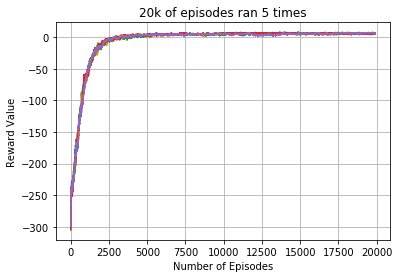

(5,)


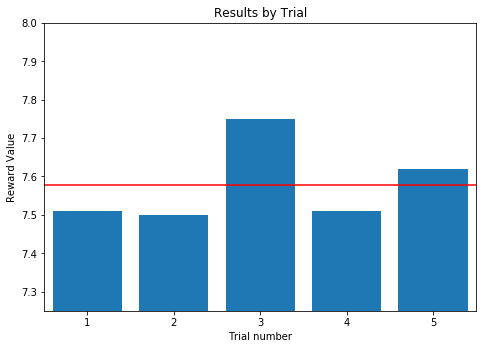

In [5]:
expected_sarsa_trial_avg = trialAvgRewards
expected_sarsa_best_reward = bestAvgRewards
avg_episodic_reward(trialAvgRewards, save=True, save_name="images/learning_rate_expected_sarsa.png")
best_avg_by_trial(bestAvgRewards, save=True, save_name="images/trial_reward_expected_sarsa.png")

## Sarsa Algorithm
Below is a 5 trial simulation using  the Sarsa on policy algorithm

In [6]:
env = gym.make('Taxi-v3')
print(env)

bestAvgRewards = []
trialAvgRewards = []
for i in range(5):
    agent = Agent(nA=6, alpha=0.1, epsilon=0.01, gamma=0.98, learning_algo='sarsa')
    avg_rewards, best_avg_reward = interact(env, agent)
    trialAvgRewards.append(avg_rewards)
    bestAvgRewards.append(best_avg_reward)
    
print('-'*100)
# print(f"{ np.mean(bestAvgRewards) } over 5 tries")
print("{} over 5 tries".format(np.mean(bestAvgRewards)))

<TimeLimit<TaxiEnv<Taxi-v3>>>
Episode 20000/20000 || Best average reward 7.328

Episode 20000/20000 || Best average reward 7.944

Episode 20000/20000 || Best average reward 7.472

Episode 20000/20000 || Best average reward 7.385

Episode 20000/20000 || Best average reward 7.111

----------------------------------------------------------------------------------------------------
7.444 over 5 tries


### Learning Rate & Reward per Trial
- Learning Rate: this graph shows the reward per trial for every episode as the algorithm learned the Q table.
- Reward per Trial: this graph shows the best reward that was obtained by the algorithm for each trial.

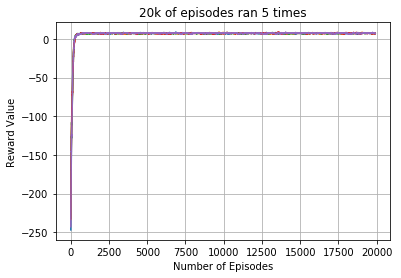

(5,)


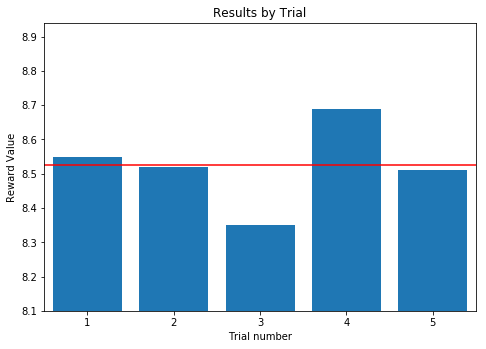

In [40]:
sarsa_trial_avg = trialAvgRewards
sarsa_best_reward = bestAvgRewards
avg_episodic_reward(trialAvgRewards, save=True, save_name="images/learning_rate_sarsa.png")
best_avg_by_trial(bestAvgRewards, save=True, save_name="images/trial_reward_sarsa.png")

## Q Learning Algorithm
Below is a 5 trial simulation using  the Q learning off policy algorithm

In [45]:
env = gym.make('Taxi-v3')
print(env)

bestAvgRewards = []
trialAvgRewards = []
for i in range(5):
    agent = Agent(nA=6, alpha=0.5, epsilon=0.01, gamma=0.97, learning_algo='qlearning')
    avg_rewards, best_avg_reward = interact(env, agent)
    trialAvgRewards.append(avg_rewards)
    bestAvgRewards.append(best_avg_reward)
    
print('-'*100)
# print(f"{ np.mean(bestAvgRewards) } over 5 tries")
print("{} over 5 tries".format(np.mean(bestAvgRewards)))
#8.5 <- sarsa type params
# nA=6, alpha=0.1, epsilon=0.01, gamma=0.75, learning_algo='qlearning' -> 8.48
# nA=6, alpha=0.5, epsilon=0.01, gamma=0.75, learning_algo='qlearning' -> 8.49
# nA=6, alpha=0.5, epsilon=0.01, gamma=0.9, learning_algo='qlearning'  -> 8.49
# nA=6, alpha=0.5, epsilon=0.01, gamma=0.97, learning_algo='qlearning' -> 8.55

<TimeLimit<TaxiEnv<Taxi-v3>>>
Episode 20000/20000 || Best average reward 8.585

Episode 20000/20000 || Best average reward 8.991

Episode 20000/20000 || Best average reward 8.537

Episode 20000/20000 || Best average reward 8.337

Episode 20000/20000 || Best average reward 8.461

----------------------------------------------------------------------------------------------------
8.559999999999999 over 5 tries


### Learning Rate & Reward per Trial
- Learning Rate: this graph shows the reward per trial for every episode as the algorithm learned the Q table.
- Reward per Trial: this graph shows the best reward that was obtained by the algorithm for each trial.

In [ ]:
q_learning_trial_avg = trialAvgRewards
q_learning_best_reward = bestAvgRewards
avg_episodic_reward(trialAvgRewards, save=True, save_name="images/learning_rate_q_learning.png")
best_avg_by_trial(bestAvgRewards, save=True, save_name="images/trial_reward_q_learning.png")

#### The chart below compares the learning performance of the different algorithms.
Note: as you can see expected sarsa and sarsa are very similar. This is due to the fact that they are on policy algorithms. In other words all 3 algorithms make policy estimates based off of the next state and next action in the Q table; However, expected sarsa and sarsa make greedy decisions based off of those estimates. The Q learning algorithm is off policy because it uses a stochastic process to determine when to explore and when to exploit the policy. 

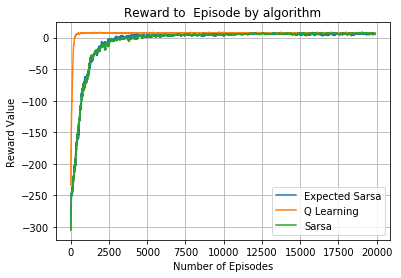